In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil.parser import parse
from tb import *

In [2]:
tb = TB(config_file='config_gbv.ini',device_name='CO2')

["cdm4160","cjmcu811","fatal","heartbeat","loadavg1","loadavg15","loadavg5","mh-z14a","notice","s8lp","sen0219","sen0219avg","sen0219cma","sen0220","t3022","uptime","uptime-linux"]


In [3]:
sensores = ["s8lp","sen0220","t3022","mh-z14a"]

# sensores = ["cdm4160","cjmcu811","sen0219","t3022","mh-z14a","sen0220","s8lp"]
datos = pd.concat([tb.get_df(key=sensor) for sensor in sensores],axis=1)
# print(datos.head())
datos.index = datos.index + pd.Timedelta("-5H")
datos.head()

,s8lp,sen0220,t3022,mh-z14a
ts,,,,
2021-06-21 12:01:15.851,NaN,NaN,476.0,NaN
2021-06-21 12:02:18.325,NaN,NaN,474.0,NaN
2021-06-21 12:03:20.867,NaN,NaN,471.0,NaN
2021-06-21 12:04:23.419,NaN,NaN,471.0,NaN
2021-06-21 12:05:06.847,NaN,NaN,474.0,NaN


In [4]:
#corta los datos de la fecha inicial al final
datos = datos["2021-07-01":]
datos

,s8lp,sen0220,t3022,mh-z14a
ts,,,,
2021-07-01 00:00:10.885,412.0,NaN,437.0,510.0
2021-07-01 00:00:26.451,412.0,NaN,436.0,509.0
2021-07-01 00:00:41.997,413.0,NaN,435.0,509.0
2021-07-01 00:00:57.557,413.0,NaN,436.0,509.0
2021-07-01 00:01:13.133,414.0,NaN,436.0,509.0
...,...,...,...,...
2021-07-06 05:51:46.092,NaN,510.0,NaN,NaN
2021-07-06 05:51:52.620,NaN,512.0,NaN,NaN
2021-07-06 05:51:56.489,511.0,NaN,505.0,641.0


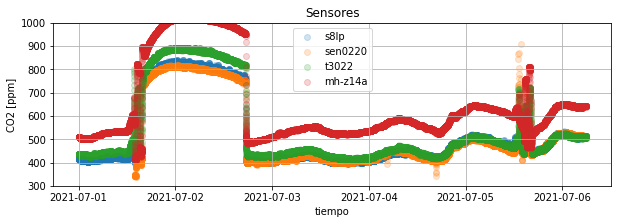

In [6]:
# sensores = ["cdm4160","cjmcu811","sen0219","t3022","mh-z14a","sen0220","s8lp"]
sensores = ["s8lp","sen0220","t3022","mh-z14a"]
# ref = "fluke"

fig, ax = plt.subplots(figsize=(10,3))

# fecha1 = parse("2021-06-22") 
# fecha2 = fecha1 + pd.Timedelta("1D")
# ax.set_xlim(fecha1,fecha2)

ax.set_ylim(300,1000)
ax.set_ylabel("CO2 [ppm]")
ax.set_xlabel("tiempo")
ax.set_title("Sensores")
ax.grid()

for sensor in sensores:
    ax.scatter(datos[sensor].index,datos[sensor],label=sensor,alpha=0.2)

ax.legend()



In [ ]:
#ajustar fecha si es necesario
datos.to_csv("../data/sensores_01-07-2021_al_05-07-2021.csv")